In [291]:
import numpy as np
import pandas as pd

In [426]:
train_df = pd.read_csv("train.tsv",sep='\t')
test_df = pd.read_csv("test.tsv",sep='\t')

In [293]:
train_df = train_df.drop(columns = "Unnamed: 0")

In [294]:
# train_df.head()

In [295]:
train_cat = pd.read_csv("train_categories.csv")

In [296]:
train_tit_len = pd.read_csv("train_title_length.csv")

In [297]:
train_text_length = pd.read_csv("train_text_length.csv")

In [298]:
vader_train_outputs_text = pd.read_csv("vader_train_outputs_text.csv")
vader_train_outputs_title = pd.read_csv("vader_train_outputs_title.csv")

In [299]:
punctuated_train_df = pd.read_csv('punctuate_train.csv')
punctuated_test_df = pd.read_csv('punctuate_test.csv')
punctuated_test_df = punctuated_test_df['Punctuate']

In [300]:
keyword_train_title = pd.read_csv('title_keyword_density.tsv', sep = '\t')
keyword_train_text = pd.read_csv('text_keyword_density.tsv', sep = '\t')

keyword_test_title = pd.read_csv('test_title_keyword_density.tsv', sep = '\t')
keyword_test_text = pd.read_csv('test_text_keyword_density.tsv', sep = '\t')

In [301]:
merged_df = pd.concat([train_cat, train_tit_len, train_text_length, 
                       vader_train_outputs_text, vader_train_outputs_title, punctuated_train_df, keyword_train_title, keyword_train_text], axis=1)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df.drop(columns=["id", "Unnamed: 0"],inplace=True)
merged_df.head()

,category_id,title_char_count,title_word_count,text_char_count,text_word_count,text_sentence_count,neg,neu,pos,compound,Punctuate,JJ_density,VBG_density,RB_density,JJ_text,VBG_text,RB_text
0,1,67,8,2733,257,16,0.109,0.789,0.102,-0.5574,1,10.000000,0.0,0.000000,10.536779,1.988072,2.584493
1,2,121,14,2630,271,14,0.095,0.832,0.073,-0.9197,0,4.347826,0.0,0.000000,8.384458,2.862986,2.658487
2,1,64,7,4052,404,13,0.052,0.859,0.089,0.9826,1,16.666667,0.0,0.000000,12.311902,1.778386,2.599179
3,3,72,7,1131,107,5,0.022,0.884,0.094,0.9335,0,20.000000,0.0,0.000000,9.615385,2.403846,1.923077
4,4,104,10,1061,100,7,0.077,0.836,0.087,0.4559,1,6.666667,0.0,6.666667,11.475410,2.732240,2.185792


In [302]:
print(len(merged_df.columns))

17


In [303]:
train_df.head()
print(len(train_df['label']), len(merged_df))
train_df['label']

30000 30000


0        1
1        0
2        1
3        0
4        0
        ..
29995    1
29996    1
29997    0
29998    1
29999    1
Name: label, Length: 30000, dtype: int64

In [304]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [305]:
torch.cuda.is_available()

True

In [412]:
X_train, X_test, y_train, y_test = train_test_split(merged_df, train_df['label'], test_size = 0.2)

In [413]:
X_train = X_train.reset_index(drop = True)
X_train

,category_id,title_char_count,title_word_count,text_char_count,text_word_count,text_sentence_count,neg,neu,pos,compound,Punctuate,JJ_density,VBG_density,RB_density,JJ_text,VBG_text,RB_text
0,3,75,11,1356,127,8,0.044,0.892,0.064,0.5411,0,5.555556,0.00,0.0,9.523810,0.000000,1.298701
1,5,55,7,1930,180,15,0.135,0.856,0.009,-0.9890,1,0.000000,0.00,0.0,5.205479,3.013699,1.917808
2,1,66,8,1526,150,8,0.145,0.708,0.147,-0.4767,1,40.000000,0.00,0.0,13.888889,0.694444,5.208333
3,6,86,8,6187,573,36,0.114,0.800,0.086,-0.9899,1,12.500000,0.00,12.5,7.523246,1.521555,4.564666
4,6,75,8,2517,235,19,0.073,0.840,0.086,0.5282,1,0.000000,0.00,0.0,6.720978,3.054990,3.665988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,8,80,14,658,69,4,0.084,0.916,0.000,-0.8308,1,18.750000,6.25,0.0,12.727273,4.545455,4.545455
23996,5,67,8,2156,200,12,0.042,0.876,0.082,0.9274,1,40.000000,0.00,0.0,8.706468,1.741294,1.741294
23997,4,145,1,145,1,1,0.000,1.000,0.000,0.0000,1,33.333333,0.00,0.0,33.333333,0.000000,0.000000
23998,5,48,7,1351,134,10,0.050,0.877,0.073,0.6360,1,11.111111,0.00,0.0,10.822511,2.164502,2.164502


In [414]:
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [415]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.long)

In [416]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

In [376]:
device = "cpu"

In [377]:
import torch
import torch.nn as nn
import torch.optim as optim

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()

        # 1D Convolutional layers
        self.conv_layer = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),  # (16, 17)
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),  # (16, 8)

            nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1),  # (32, 8)
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),  # (32, 4)

            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),  # (64, 4)
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)  # (64, 2)
        )

        # Fully connected layers after the convolutional layers
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 2, 128),  # Flattened input to the fully connected layer (64 channels, 2 length)
            nn.ReLU(),
            nn.Linear(128, 2)  # Output layer with 2 units for binary classification
        )

    def forward(self, x):
        x = x.view(x.size(0), 1, 17)  # Reshape input to [batch_size, 1, 17]
        x = self.conv_layer(x)  # Apply convolutional layers
        x = torch.flatten(x, 1)  # Flatten the tensor before feeding it into the fully connected layers
        x = self.fc_layer(x)  # Apply fully connected layers
        return x
    
model = ConvolutionalNetwork().to(device)
model = model.to(device)
print(model)
print(device)

ConvolutionalNetwork(
  (conv_layer): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU()
    (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)
cpu


In [398]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.001)

In [399]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [400]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [401]:
device = torch.device("cpu") 
epochs = 150
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.677827  [   32/24000]
loss: 0.575739  [ 3232/24000]
loss: 0.527260  [ 6432/24000]
loss: 0.464972  [ 9632/24000]
loss: 0.548976  [12832/24000]
loss: 0.502925  [16032/24000]
loss: 0.489505  [19232/24000]
loss: 0.463742  [22432/24000]
Test Error: 
 Accuracy: 78.1%, Avg loss: 0.454500 

Epoch 2
-------------------------------
loss: 0.354732  [   32/24000]
loss: 0.514523  [ 3232/24000]
loss: 0.355593  [ 6432/24000]
loss: 0.399638  [ 9632/24000]
loss: 0.267157  [12832/24000]
loss: 0.415693  [16032/24000]
loss: 0.310008  [19232/24000]
loss: 0.321101  [22432/24000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.378731 

Epoch 3
-------------------------------
loss: 0.258850  [   32/24000]
loss: 0.306196  [ 3232/24000]
loss: 0.424746  [ 6432/24000]
loss: 0.484522  [ 9632/24000]
loss: 0.340423  [12832/24000]
loss: 0.367432  [16032/24000]
loss: 0.330844  [19232/24000]
loss: 0.401697  [22432/24000]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.356075 

Epoc

In [402]:
y_train

0        1
1        0
2        0
3        1
4        1
        ..
23995    1
23996    1
23997    0
23998    0
23999    0
Name: label, Length: 24000, dtype: int64

In [417]:
X_train

,category_id,title_char_count,title_word_count,text_char_count,text_word_count,text_sentence_count,neg,neu,pos,compound,Punctuate,JJ_density,VBG_density,RB_density,JJ_text,VBG_text,RB_text
0,3,75,11,1356,127,8,0.044,0.892,0.064,0.5411,0,5.555556,0.00,0.0,9.523810,0.000000,1.298701
1,5,55,7,1930,180,15,0.135,0.856,0.009,-0.9890,1,0.000000,0.00,0.0,5.205479,3.013699,1.917808
2,1,66,8,1526,150,8,0.145,0.708,0.147,-0.4767,1,40.000000,0.00,0.0,13.888889,0.694444,5.208333
3,6,86,8,6187,573,36,0.114,0.800,0.086,-0.9899,1,12.500000,0.00,12.5,7.523246,1.521555,4.564666
4,6,75,8,2517,235,19,0.073,0.840,0.086,0.5282,1,0.000000,0.00,0.0,6.720978,3.054990,3.665988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,8,80,14,658,69,4,0.084,0.916,0.000,-0.8308,1,18.750000,6.25,0.0,12.727273,4.545455,4.545455
23996,5,67,8,2156,200,12,0.042,0.876,0.082,0.9274,1,40.000000,0.00,0.0,8.706468,1.741294,1.741294
23997,4,145,1,145,1,1,0.000,1.000,0.000,0.0000,1,33.333333,0.00,0.0,33.333333,0.000000,0.000000
23998,5,48,7,1351,134,10,0.050,0.877,0.073,0.6360,1,11.111111,0.00,0.0,10.822511,2.164502,2.164502


In [418]:
# y_train.reset_index()

In [404]:
model.eval()

ConvolutionalNetwork(
  (conv_layer): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU()
    (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [419]:
# Convert test data to tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

In [420]:
print(len(X_test.values))

6000


In [421]:
# with torch.no_grad():  # Disable gradient calculation
#     outputs = model(X_test_tensor)  # Get logits
#     probabilities = torch.sigmoid(outputs)  # Apply sigmoid for probabilities
#     predictions = (probabilities > 0.5).float()  # Convert to 0 or 1
with torch.no_grad():  # Disable gradient calculation
    outputs = model(X_test_tensor)  # Get logits (size: [batch_size, 2])
    probabilities = torch.softmax(outputs, dim=1)  # Apply softmax to get class probabilities
    predictions = torch.argmax(probabilities, dim=1)  #


In [422]:
y_pred = predictions.cpu().numpy()
y_true = y_test_tensor.view(-1).cpu().numpy()
print(len(y_pred), len(y_true))

6000 6000


In [423]:
accuracy = (y_pred == y_true).sum() / len(y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 92.63%


In [424]:
test_df.head()

,title,text,subject,date,label
0,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0


In [427]:
test_df.drop(columns = "Unnamed: 0", inplace = True)

In [428]:
test_df.head()

,title,text,subject,date,label
0,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0


In [429]:
test_cat = pd.read_csv("test_categories.csv")

In [430]:
test_tit_len_test = pd.read_csv("test_title_length.csv")

In [431]:
train_text_length_test = pd.read_csv("test_text_length.csv")

In [432]:
vader_train_outputs_text_test = pd.read_csv("vader_test_outputs_text.csv")
vader_train_outputs_title_test = pd.read_csv("vader_test_outputs_title.csv")

In [433]:
punctuated_test_df.head()

0    1
1    1
2    1
3    1
4    1
Name: Punctuate, dtype: int64

In [434]:
merged_test_df = pd.concat([test_cat, test_tit_len_test, train_text_length_test, 
                       vader_train_outputs_text_test, vader_train_outputs_title_test, punctuated_test_df, keyword_test_text, keyword_test_title], axis=1)
merged_test_df = merged_test_df.loc[:, ~merged_test_df.columns.duplicated()]
merged_test_df.drop(columns=["id", "Unnamed: 0"],inplace=True)
merged_test_df.head()

,category_id,title_char_count,title_word_count,text_char_count,text_word_count,text_sentence_count,neg,neu,pos,compound,Punctuate,JJ_text,VBG_text,RB_text,JJ_density,VBG_density,RB_density
0,6,84,8,2290,209,15,0.109,0.724,0.167,0.9849,1,6.733167,2.743142,5.486284,0.000000,0.000000,7.142857
1,1,84,11,658,70,4,0.102,0.771,0.127,0.4215,1,14.516129,2.419355,2.419355,21.428571,0.000000,0.000000
2,4,103,11,2644,242,17,0.082,0.872,0.046,-0.8980,1,10.267857,2.008929,6.250000,11.764706,5.882353,5.882353
3,1,57,7,279,27,1,0.050,0.950,0.000,-0.2960,1,10.638298,4.255319,0.000000,10.000000,10.000000,0.000000
4,3,123,15,344,26,1,0.294,0.612,0.093,-0.9206,1,9.677419,4.838710,0.000000,18.181818,4.545455,4.545455


In [435]:
X_test = merged_test_df.values
y_test = test_df['label']
y_test_tensor = torch.tensor(y_test.values, dtype = torch.long)

In [436]:
# Convert test data to tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

In [437]:
with torch.no_grad():  # Disable gradient calculation
    outputs = model(X_test_tensor)  # Get logits (size: [batch_size, 2])
    probabilities = torch.softmax(outputs, dim=1)  # Apply softmax to get class probabilities
    predictions = torch.argmax(probabilities, dim=1)  

In [438]:
y_pred = predictions.cpu().numpy()
y_true = y_test_tensor.view(-1).cpu().numpy()
print(len(y_pred), len(y_true))

8267 8267


In [439]:
accuracy = (y_pred == y_true).sum() / len(y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.89%


In [447]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
cm = confusion_matrix(y_test, y_pred)

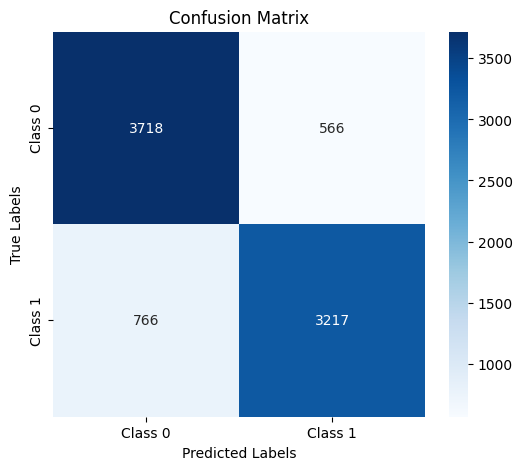

In [448]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [446]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4284
           1       0.85      0.81      0.83      3983

    accuracy                           0.84      8267
   macro avg       0.84      0.84      0.84      8267
weighted avg       0.84      0.84      0.84      8267



In [176]:
print("Predictions shape:", predictions.shape)       # Before flattening
print("y_test_tensor shape:", y_test_tensor.shape)   # Before flattening


Predictions shape: torch.Size([8267, 2])
y_test_tensor shape: torch.Size([8267, 1])


ValueError: operands could not be broadcast together with shapes (16534,) (8267,) 